<div style="text-align: right"> Provided on April 1 and due on April 15 [BRI516, Spring/2020] </div>

For homework in general:
* Install `Anaconda` and create a python environment with `NumPy`, `Pandas`, `Matplotlib`, `scikit-learn` in Python >= 3.5 
* Visualize the results of the code as much as possible and add comments/description on the code/results
* Please upload your jupyter-notebook file for homework to `Blackboard`

### [HW#1] Perceptron, logistic regression, and support vector machine

1. Load the Iris data ('iris.csv') using Pandas


In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris_data = pd.read_csv('data/iris.csv', header=None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Divide the overall samples (n=150) into 80% for training and 20% for test

(a) Using the scikit-learn's `train_test_split` class with a `stratify` option

(b) Implement your own class, `my_train_test_split` with a `stratify` option available

(c) Compare the results from (a) and (b) 


In [331]:
from sklearn.model_selection import train_test_split
iris_data_x = iris_data.loc[:, 0:3]
iris_data_y = iris_data.loc[:,4]
for idx, flower in enumerate(iris_data_y.unique()):
    iris_data_y[iris_data_y==flower] = idx
X_train, X_test, Y_train, Y_test = train_test_split(iris_data_x, iris_data_y, test_size = 0.2, stratify = iris_data_y)

In [332]:
class My_train_test_split:
    def __init__(self, *array, test_size = None, train_size = None, shuffle =True, stratify = None):
        self.X_train = None   
        self.X_test = None
        self.Y_train = None
        self.Y_test = None
        if test_size == None and train_size == None:
            test_size = 0.25
        elif test_size == None:
            test_size = 1.0 - train_size
        if shuffle == True:
            if stratify is None:
                array_length = array[0].shape[0]
                shuffler = np.arange(array_length)
                np.random.shuffle(shuffler)
                X_shuffled = array[0].loc[shuffler].reset_index(drop=True)
                Y_shuffled = array[1].loc[shuffler].reset_index(drop=True)
                self.X_train = X_shuffled.loc[array_length * test_size:]
                self.X_test = X_shuffled.loc[:array_length * test_size-1]
                self.Y_train = Y_shuffled.loc[array_length * test_size:]
                self.Y_test = Y_shuffled.loc[:array_length * test_size-1]
            else:
                for flower in stratify.unique():
                    flower_X = array[0][stratify==flower].reset_index(drop=True)
                    flower_Y = array[1][stratify==flower].reset_index(drop=True)
                    array_length = flower_Y.shape[0]
                    shuffler = np.arange(array_length)
                    np.random.shuffle(shuffler)
                    X_shuffled = flower_X.loc[shuffler].reset_index(drop=True)
                    Y_shuffled = flower_Y.loc[shuffler].reset_index(drop=True)
                    if self.X_train is None:
                        self.X_train = X_shuffled.loc[array_length * test_size:]
                        self.X_test = X_shuffled.loc[:array_length * test_size-1]
                        self.Y_train = Y_shuffled.loc[array_length * test_size:]
                        self.Y_test = Y_shuffled.loc[:array_length * test_size-1]
                    else:
                        self.X_train = self.X_train.append(X_shuffled.loc[array_length * test_size:]).reset_index(drop=True)
                        self.X_test = self.X_test.append(X_shuffled.loc[:array_length * test_size-1]).reset_index(drop=True)
                        self.Y_train = self.Y_train.append(Y_shuffled.loc[array_length * test_size:]).reset_index(drop=True)
                        self.Y_test = self.Y_test.append(Y_shuffled.loc[:array_length * test_size-1]).reset_index(drop=True)
    def splitted(self):
        return self.X_train, self.X_test, self.Y_train, self.Y_test
my_train_test_split = My_train_test_split(iris_data_x, iris_data_y, test_size = 0.2, stratify = iris_data_y)
my_X_train, my_X_test, my_Y_train, my_Y_test = my_train_test_split.splitted()

In [333]:
print(np.bincount(iris_data_y))
print(np.bincount(Y_train))
print(np.bincount(Y_test))

[50 50 50]
[40 40 40]
[10 10 10]


You can see result is quite same

In [334]:

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, Y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, flower in enumerate(np.unique(y)):
        plt.scatter(X[Y==flower][:, 0], X[Y==flower][:, 1], color=colors[idx], label=flower)
    plt.legend(loc='best')


In [335]:
%matplotlib inline
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [336]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(np.unique(y_train))

[0 1 2]


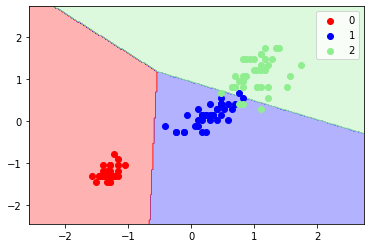

In [337]:
sgd = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, sgd)

<br>

※ In 3~5, either is fine to use train/test sets from 'train_test_split' or 'my_train_test_split'


3. Apply the Perceptron model to classfy the three flower classes as good as possible

(a) Using the class, `Perceptron` in scikit-learn 

(b) Using the class, `SGDClassifier` in scikit-learn: implement stochastic gradient algorithm of the Perceptron using the `partial_fit` method of this class for a varying mini-batch sizes (i.e., mini-batch size = 1, 2, 10)

(c) Discuss the results from (a) and (b)


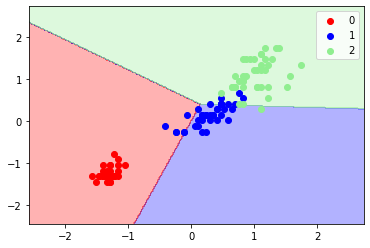

In [338]:
perceptron = linear_model.Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, perceptron)

<br>

4. Apply the logistic regression (LR) model to classfy the three flower classes as good as possible

(a) Using the class, `LogisticRegression` in scikit-learn 


(b) Using the class, `SGDClassifier` in scikit-learn: implement stochastic gradient algorithm of the Perceptron using the `partial_fit` method of this class for a varying mini-batch sizes (i.e., mini-batch size = 1, 2, 10)

(c) Discuss the results from (a) and (b)


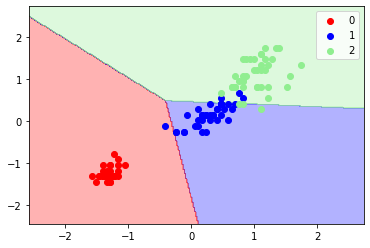

In [339]:
logreg = linear_model.LogisticRegression(max_iter=1000, tol=1e-3)
logreg.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, logreg)

<br>

5. Apply the support vector machine (SVM) model to classfy the three flower classes as good as possible

(a) Using the class, `SVC` in scikit-learn 


(b) Using the class, `SGDClassifier` in scikit-learn: implement stochastic gradient algorithm of the Perceptron using the `partial_fit` method of this class for a varying mini-batch sizes (i.e., mini-batch size = 1, 2, 10)

(c) Discuss the results from (a) and (b)


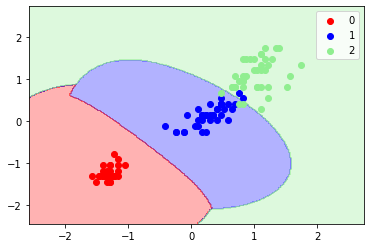

In [340]:
from sklearn import svm
svc = svm.SVC(max_iter=1000, tol=1e-3)
svc.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, svc)

<br>

6. Discuss the results from (3) to (5)

Notes:
* Students are supposed to set hyperparams (such as number of epochs) on their own
* For each of the classification tests, show the following: <br>
(a) learning curves (along epochs) of the cost/error from the training and test data where applicable <br>
(b) learning curves (along epochs) of average weight update term for each epoch (i.e., $\Delta w$) <br>
(c) decision boundary of the trained model along with training and test samples in the scatter plot

* Draw plots using matplotlib

* Please discuss each of your results with at least few lines of text

# Discuss Result
both perceptron and logistic regression models are showing linear decision boundary, while SVC shows non-linear boundary